In [1]:
# import libraries
import math
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.stats as st
pd.set_option('display.max_columns', None)

In [2]:
# import listings 2018 csv to pd dataframe
path="./airbnbFINAL_Swobabika.csv"
airbnb_df = pd.read_csv(path, low_memory=False)

In [3]:

airbnb_df2 = airbnb_df[['host_is_superhost',
           'city',
           'property_type',
           'accommodates',
           'amenities',
           'price',
           'reviews_per_month',
           'distance_from_cbd',
           'station_distance']].loc[airbnb_df['review_scores_rating'] != 0].copy()
airbnb_df2['distance_from_cbd'] = airbnb_df2['distance_from_cbd'].round(2)
airbnb_df2['price_per_person']=airbnb_df2['price']/airbnb_df2['accommodates']

In [4]:
airbnb_df2

,host_is_superhost,city,property_type,accommodates,amenities,price,reviews_per_month,distance_from_cbd,station_distance,price_per_person
0,t,St Kilda,Apartment,3,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",159.0,0.15,5.21,1.4,53.000000
1,t,Richmond,Apartment,2,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",98.0,1.75,3.65,1.1,49.000000
2,t,St Kilda,Apartment,4,"{TV,Internet,Wifi,Kitchen,""Buzzer/wireless int...",190.0,0.60,5.44,1.2,47.500000
3,t,Melbourne,Loft,4,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",228.0,2.07,0.07,0.5,57.000000
4,t,Richmond,Apartment,4,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",138.0,0.46,2.79,0.5,34.500000
...,...,...,...,...,...,...,...,...,...,...
8914,f,Melbourne,Apartment,1,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,Gym,B...",120.0,1.00,0.73,0.4,120.000000
8917,f,Richmond,Apartment,4,"{TV,""Free parking on premises"",Heating,Washer,...",109.0,1.00,3.29,0.2,27.250000
8918,t,Melbourne,Apartment,6,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,Gym,B...",148.0,2.00,0.08,0.4,24.666667
8920,f,Melbourne,Apartment,2,"{TV,Wifi,""Air conditioning"",Kitchen,Elevator,H...",134.0,2.00,0.65,0.5,67.000000


In [5]:
airbnb_df3 = airbnb_df2.loc[(airbnb_df2['city'] == 'Melbourne')]

In [6]:
def create_plot(x_values,y_values,title,x_label,y_label):
    # create scatter plot
    plt.figure(figsize=(10,8))    
    plt.scatter(x_values,y_values)
    plt.title(f'{title}')
    # calculate line variables
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    # calculate regress values
    regress_values = x_values * slope + intercept
    # add line and equation
    plt.plot(x_values,regress_values,"r-")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(max(x_values)/2,max(y_values)-(max(y_values)*.1)),fontsize=15,color="red")
    print(f"The r-value is {rvalue}")

    # add labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # print visualisation
    plt.show()

The r-value is 0.0798798145565233


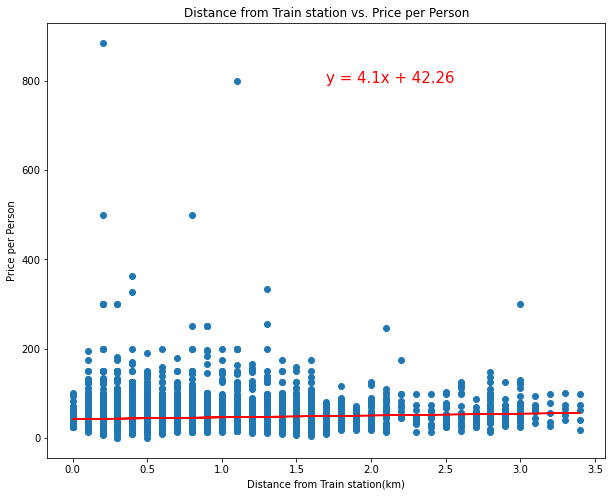

In [7]:
# function call for Distance from Train station vs. Price per Person
create_plot(airbnb_df2['station_distance'],
            airbnb_df2['price_per_person'],
            'Distance from Train station vs. Price per Person',
            'Distance from Train station(km)',
            'Price per Person')

The r-value is 0.0003867919185768678


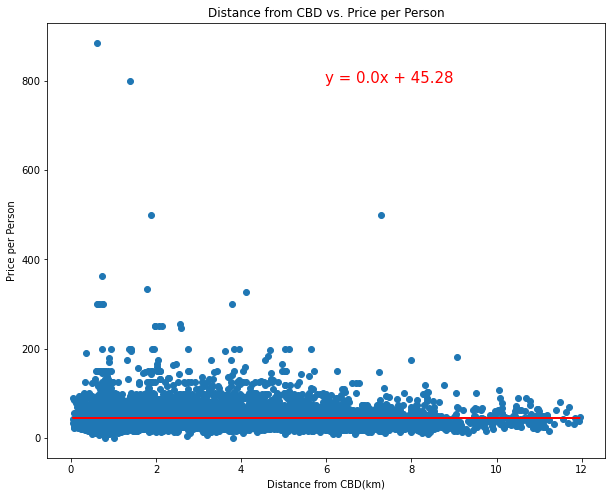

In [8]:
# function call for Distance from Train station vs. Price per Person
create_plot(airbnb_df2['distance_from_cbd'],
            airbnb_df2['price_per_person'],
            'Distance from CBD vs. Price per Person',
            'Distance from CBD(km)',
            'Price per Person')

The r-value is -0.19165611452865863


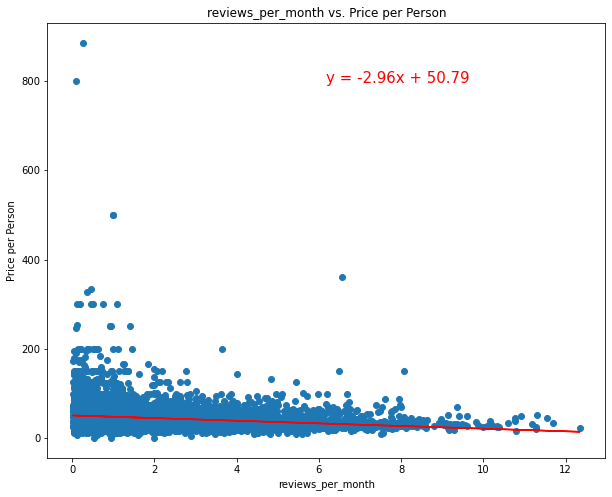

In [9]:
# function call for Distance from Train station vs. Price per Person
create_plot(airbnb_df2['reviews_per_month'],
            airbnb_df2['price_per_person'],
            'reviews_per_month vs. Price per Person',
            'reviews_per_month',
            'Price per Person')